# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Исследовательский анализ данных

In [3]:
data = pd.read_csv('/datasets/faces/labels.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


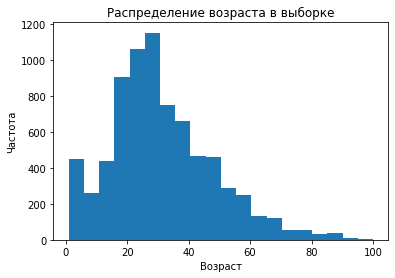

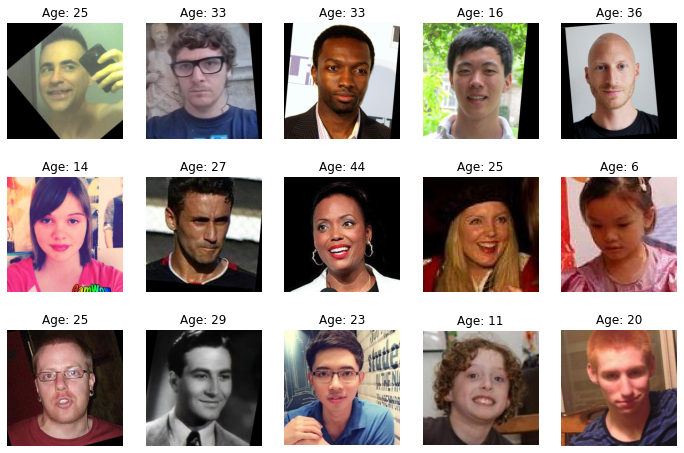

In [6]:
plt.hist(data['real_age'], bins=20)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста в выборке')
plt.show()

image_dir = '/datasets/faces/final_files'
sample_images = data.sample(15)

figure, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
axes = axes.ravel()

for i, (_, row) in enumerate(sample_images.iterrows()):
    image_path = image_dir + '/' + row['file_name']
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title('Age: ' + str(row['real_age']))
    axes[i].axis('off')

### Предварительный вывод 1

В представленной выборке 7591 фотографий с обозначенными возрастами. Фотографии одного размера, размеры лица на фото примерно одинаковые, качество фотографий (фокусировка, освещённость) разные. Возраст людей на фотографиях от 1 до 100 лет, со средним возрастом 31 год.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

# < def load_train(path):
    train_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2)
    
    train_data = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory=image_dir,
        x_col='file_name',
        y_col='real_age',
        batch_size=64,
        seed=42,
        class_mode='raw',
        target_size=(224, 224),
        subset='training'
    )
    return train_data

def load_test(path):
    test_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1./255)
    
    test_data = test_datagen.flow_from_dataframe(
        dataframe=data,
        directory=image_dir,
        x_col='file_name',
        y_col='real_age',
        batch_size=64,
        seed=42,
        class_mode='raw',
        target_size=(224, 224),
        subset='validation'
    )
    return test_data

def create_model(input_shape):
    backbone = ResNet50(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False
    )
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2,
        shuffle=True
    )
    return model>

```

```

# < Train for 89 steps, validate for 30 steps
Epoch 1/10
89/89 - 124s - loss: 386.8244 - mae: 14.4615 - val_loss: 823.3147 - val_mae: 23.8169
Epoch 2/10
89/89 - 101s - loss: 117.6364 - mae: 8.1700 - val_loss: 679.0577 - val_mae: 21.1284
Epoch 3/10
89/89 - 99s - loss: 94.9278 - mae: 7.3393 - val_loss: 706.6268 - val_mae: 21.6572
Epoch 4/10
89/89 - 98s - loss: 79.7448 - mae: 6.7201 - val_loss: 706.8120 - val_mae: 21.6185
Epoch 5/10
89/89 - 98s - loss: 71.6426 - mae: 6.4161 - val_loss: 534.8376 - val_mae: 17.6726
Epoch 6/10
89/89 - 107s - loss: 64.2656 - mae: 6.0976 - val_loss: 294.1253 - val_mae: 12.7104
Epoch 7/10
89/89 - 114s - loss: 55.3924 - mae: 5.6714 - val_loss: 153.6831 - val_mae: 9.5505
Epoch 8/10
89/89 - 113s - loss: 53.5148 - mae: 5.5205 - val_loss: 127.1770 - val_mae: 8.4715
Epoch 9/10
89/89 - 114s - loss: 46.3626 - mae: 5.2034 - val_loss: 96.6419 - val_mae: 7.3562
Epoch 10/10
89/89 - 113s - loss: 42.3791 - mae: 4.9769 - val_loss: 83.7795 - val_mae: 6.8988
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
30/30 - 12s - loss: 83.7795 - mae: 6.8988
Test MAE: 6.8988 >
```

## Анализ обученной модели

Для определения возраста по фотографии была использована модель ResNet50. Для обучения и проверки роботоспособности модели использовался сет из 7591 фотографий с обозначенными возрастами. Фотографии одного размера, размеры лица на фото примерно одинаковые, качество фотографий (фокусировка, освещённость) разные. Возраст людей на фотографиях от 1 до 100 лет, со средним возрастом 31 год. Соотношение тренировочной и валидационной выборки 3:1. Тренировочную часть подверли аугментации (отражения, сдвиги). Метрика качества обучения модели определена MAE. По итогам обучения MAE на валидационной выборке составила 6.8988 лет, таким образом целевой показатель точности достигнут.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Дополнение к выводу: Учитывая доминирование покупателей в возрасте 20-40 лет и погрешность в в определении возраста почти 7 лет, задачу стратификации покупателей на крупные сегменты: 10-30, 30-50, 50-70 на практике решить, скорее всего, получится. Необходимо продолжить тестирование модели на подгруппах сформированных из людей более близкого возраста. 
    Задачу контроля продавцов с продажей товаров с возрастным цензом решить с такой погрешностью модели невозможно.
</div>